In [71]:
import pandas as pd
df = pd. read_csv('netflix_titles.csv')

In [72]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [73]:
# importing libraries 
import pandas as pd
import sqlalchemy as sal  #used to connect to sql server 
engine = sal.create_engine('mssql://NANDINI\SQLEXPRESS/master?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn=engine.connect()  # here mssql is the workolace, nandini\sqlexpress is the server name , and  after is the odbc driver source administration -user data sources



In [74]:
#df.to_sql('netflix_raw', con=conn , index=False, if_exists ='append')
#conn.close()


df.to_sql('netflix_raw', con=conn, index=False, if_exists='append')

107

In [75]:
df[df.show_id=='s5023']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5022,s5023,Movie,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,"February 28, 2018",2017,TV-MA,110 min,"Dramas, International Movies, Thrillers",After people in his town start turning up dead...


# Analysis (EDA)

 # 1. Pie Chart for Distribution of Movies and TV Shows on Netflix

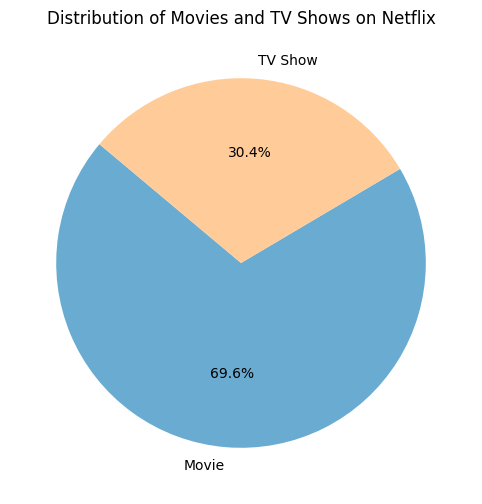

In [76]:
import matplotlib.pyplot as plt

# Data
types = ['Movie', 'TV Show']
counts = [6131, 2676]

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=types, autopct='%1.1f%%', startangle=140, colors=['#6aabd1', '#ffcc99'])
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.show()

# 2. Line Chart for Number of Titles Released Each Year

In [78]:
# Display the first few rows of the DataFrame  
print(df.head())  

# Check for the presence of ellipsis or any strange values  
print(df[['release_year', 'title']])

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [87]:
# Check for unique values in the columns  
print(df['release_year'].unique())  
print(df['title'].unique())

[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
[  nan  678. 2012.  122. 3022. 1994. 1983. 1922.   46.    9.   21.  187.
  706. 1920.]


In [95]:
# Convert columns to numeric, forcing non-convertible values to NaN  
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')  
df['title'] = pd.to_numeric(df['title'], errors='coerce')  

# Drop any rows that contain NaN values in those columns  
df = df.dropna(subset=['release_year', 'title'])

In [96]:
print(df.dtypes)  # Check to make sure both columns are of numeric types

show_id          object
type             object
title           float64
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
dtype: object


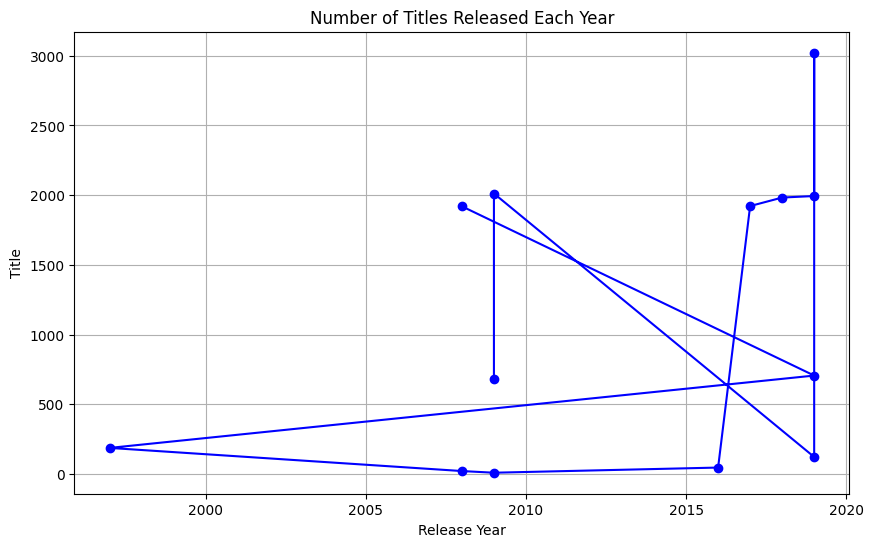

In [97]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(10, 6))  
plt.plot(df['release_year'], df['title'], marker='o', linestyle='-', color='b')  
plt.title('Number of Titles Released Each Year')  
plt.xlabel('Release Year')  
plt.ylabel('Title')  
plt.grid()  
plt.show()

# 3. Bar Chart for Distribution of Different Ratings for Netflix Titles

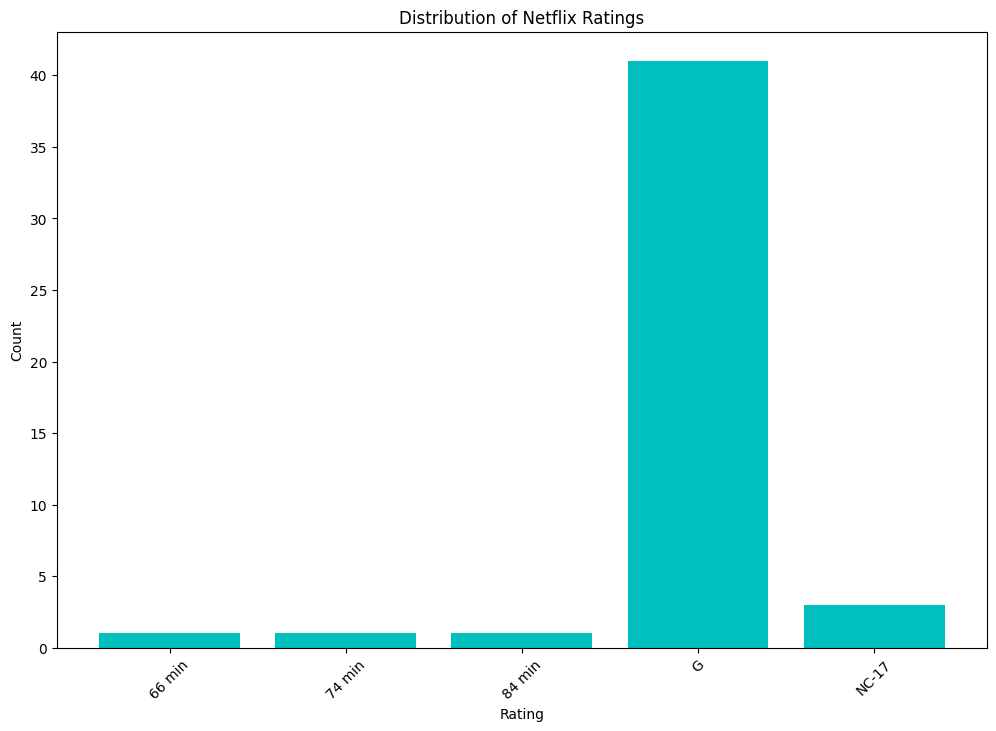

In [98]:
import matplotlib.pyplot as plt  
import pandas as pd  

# Data  
ratings = ['66 min', '74 min', '84 min', 'G', 'NC-17']  # Replace with actual data  
counts = [1, 1, 1, 41, 3]  # Replace with actual counts  
rating_data = pd.DataFrame({'rating': ratings, 'count': counts})  

# Bar chart  
plt.figure(figsize=(12, 8))  
plt.bar(rating_data['rating'], rating_data['count'], color='c')  
plt.title('Distribution of Netflix Ratings')  
plt.xlabel('Rating')  
plt.ylabel('Count')  
plt.xticks(rotation=45)  
plt.show()